In [1]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.3 MB/s 
     |████████████████████████████████| 2.0 MB 48.6 MB/s 
     |████████████████████████████████| 125 kB 42.3 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 17.9 MB 439 kB/s 
     |████████████████████████████████| 25.9 MB 4.9 MB/s 
     |████████████████████████████████| 262 kB 49.8 MB/s 
     |████████████████████████████████| 1.7 MB 47.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 6.8 MB 48.0 MB/s 
     |████████████████████████████████| 1.3 MB 49.4 MB/s 
     |████████████████████████████████| 10.4 MB 27.4 MB/s 
     |████████████████████████████████| 

In [1]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LinearRegression


from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


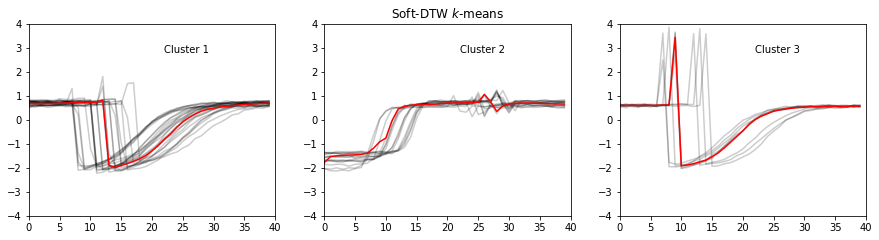

In [ ]:
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")
    plt.gcf().set_size_inches(15, 12)

In [9]:
mev = pd.read_excel('/content/gdp_imf_clustered.xlsx')

In [10]:
mev.columns.values

array(['year', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       'Cluster'], dtype=object)

In [11]:
mev.head()

,year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Cluster
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.367,4.553,5.146,6.167,6.925,8.556,10.297,12.066,15.325,17.890,20.293,20.170,20.635,20.220,17.994,18.910,18.401,18.876,19.132,19.938,0
1,Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,2.779,2.221,1.333,0.843,1.461,2.361,2.882,3.200,2.259,2.560,3.209,3.483,3.928,4.348,5.611,7.185,8.052,8.896,10.677,12.881,12.044,11.937,12.899,12.324,12.784,13.246,11.389,11.862,13.053,15.147,15.276,15.147,17.138,0
2,Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,52.558,61.892,46.670,49.217,50.963,42.426,42.066,46.941,48.178,48.188,48.845,54.749,54.745,56.761,67.864,85.327,103.198,117.027,134.977,171.001,137.054,161.207,200.251,209.059,209.755,213.810,165.979,160.034,170.207,175.367,171.070,144.294,151.459,0
3,Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,11.421,12.571,12.186,9.395,6.819,4.965,6.197,7.994,9.388,7.958,7.526,11.166,10.930,15.286,17.813,23.552,36.971,52.381,65.266,88.539,70.307,83.799,111.790,128.053,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440,66.493,0
4,Antigua and Barbuda,0.131,0.148,0.164,0.182,0.208,0.241,0.290,0.337,0.399,0.439,0.459,0.482,0.499,0.535,0.589,0.577,0.634,0.681,0.728,0.766,0.830,0.801,0.815,0.856,0.920,1.022,1.157,1.311,1.368,1.224,1.149,1.138,1.200,1.181,1.250,1.337,1.437,1.468,1.605,1.662,1.390,1.376,0


In [15]:
gdp_df = mev[mev['Cluster']==3].drop(columns=['Cluster'])
gdp_df = gdp_df.T
gdp_df.columns = gdp_df.iloc[0]
gdp_df = gdp_df.iloc[1:,:]
gdp_df

year,Australia,Brazil,Canada,France,India,Indonesia,Italy,Korea,Mexico,Netherlands,Russia,Spain,Turkey,United Kingdom
1980,162.628,145.819,276.035,702.243,189.438,99.296,482.019,65.368,228.606,193.758,0.0,230.759,96.596,603.983
1981,188.067,167.583,307.246,618.954,196.535,110.848,437.124,72.934,293.61,162.4,0.0,204.588,97.865,587.652
1982,186.709,179.166,314.639,588.015,203.537,113.799,432.001,78.349,213.077,157.338,0.0,197.643,88.918,558.72
1983,179.151,143.652,341.863,562.499,222.049,103.149,448.304,87.761,173.714,153.179,0.0,172.856,84.968,532.476
1984,196.777,142.957,356.728,532.339,215.556,107.218,442.925,97.511,204.86,142.578,0.0,172.381,82.642,504.571
1985,174.067,226.938,366.184,557.561,237.618,107.062,457.397,101.296,217.388,144.655,0.0,181.62,92.827,536.938
1986,181.147,263.256,379.015,772.838,252.751,101.22,647.819,116.836,150.513,201.599,0.0,251.304,102.337,655.086
1987,212.712,286.539,433.14,935.117,283.75,95.214,813.082,147.949,165.058,246.928,0.0,318.389,118.926,813.006
1988,270.594,320.105,509.38,1020.88,299.645,107.279,900.829,199.593,201.926,264.223,0.0,374.068,125.032,989.57
1989,307.72,439.434,567.225,1026.18,301.234,122.582,936.906,246.929,246.079,260.532,0.0,412.59,147.727,1007.45


In [21]:
gdp_df.columns

Index(['Australia', 'Brazil', 'Canada', 'France', 'India', 'Indonesia',
       'Italy', 'Korea', 'Mexico', 'Netherlands', 'Russia', 'Spain', 'Turkey',
       'United Kingdom'],
      dtype='object', name='year')

In [22]:
for i in gdp_df.columns:
  gdp_df[i] = gdp_df[i].astype(float)

In [23]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1980 to 2021
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Australia       42 non-null     float64
 1   Brazil          42 non-null     float64
 2   Canada          42 non-null     float64
 3   France          42 non-null     float64
 4   India           42 non-null     float64
 5   Indonesia       42 non-null     float64
 6   Italy           42 non-null     float64
 7   Korea           42 non-null     float64
 8   Mexico          42 non-null     float64
 9   Netherlands     42 non-null     float64
 10  Russia          42 non-null     float64
 11  Spain           42 non-null     float64
 12  Turkey          42 non-null     float64
 13  United Kingdom  42 non-null     float64
dtypes: float64(14)
memory usage: 4.9+ KB


**Predicting Spain**

In [44]:

s = setup(gdp_df, target = 'Spain', train_size = 0.8,
      data_split_shuffle = False, fold_strategy = 'timeseries', fold = 3,
      normalize=True,normalize_method='minmax',
      verbose = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Spain
2,Original Data,"(42, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33, 12)"


In [45]:
best_model = compare_models(sort = 'R2', verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,66.1439,6.452069e+03,76.3662,5.953000e-01,0.0826,0.0714,0.0400
llar,Lasso Least Angle Regression,62.7802,5.891613e+03,73.2252,5.608000e-01,0.0891,0.0752,0.0167
br,Bayesian Ridge,65.2040,6.073574e+03,75.7044,5.462000e-01,0.0820,0.0722,0.0233
omp,Orthogonal Matching Pursuit,101.2466,1.225760e+04,106.6867,2.090000e-01,0.1350,0.1311,0.0167
par,Passive Aggressive Regressor,104.1838,1.453932e+04,113.1924,-8.081000e-01,0.1567,0.1363,0.0167
lasso,Lasso Regression,127.2082,2.222013e+04,139.0625,-1.204100e+00,0.1731,0.1462,0.0167
lr,Linear Regression,122.9809,2.948650e+04,158.4580,-3.735300e+00,0.1862,0.1691,0.0167
xgboost,Extreme Gradient Boosting,210.7516,6.833286e+04,247.9050,-4.325100e+00,0.3087,0.2249,0.3200
ada,AdaBoost Regressor,211.0928,6.906821e+04,249.8966,-4.352500e+00,0.3118,0.2247,0.0733
et,Extra Trees Regressor,211.6131,6.917902e+04,250.1589,-4.395600e+00,0.3129,0.2256,0.4600


In [46]:
model = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40.4496,2040.0542,45.1670,0.5770,0.0807,0.0711
1,59.6704,6054.5403,77.8109,0.7741,0.0905,0.0738
2,98.3117,11261.6139,106.1208,0.4349,0.0766,0.0692
Mean,66.1439,6452.0695,76.3662,0.5953,0.0826,0.0714
Std,24.0615,3775.1656,24.9052,0.1391,0.0058,0.0019


In [47]:
tuned_model = tune_model(model, choose_better=True,n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,31.2017,1548.5020,39.3510,0.6789,0.0717,0.0558
1,43.3669,2429.1700,49.2866,0.9093,0.0641,0.0591
2,100.9271,12422.3832,111.4557,0.3766,0.0794,0.0701
Mean,58.4986,5466.6851,66.6978,0.6550,0.0717,0.0617
Std,30.4098,4931.5445,31.9075,0.2181,0.0062,0.0061


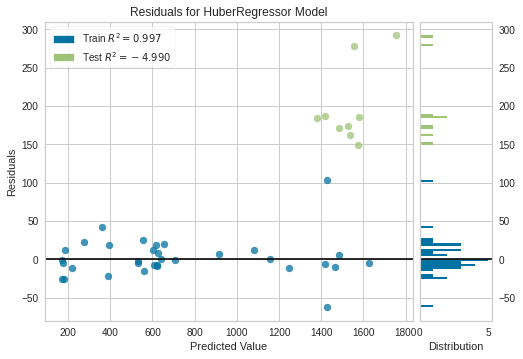

In [48]:
plot_model(tuned_model)

In [49]:
tuned_model.get_params

<bound method BaseEstimator.get_params of HuberRegressor(alpha=0.0005, epsilon=1.3, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)>

In [50]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Predicting Brazil**

In [54]:

s2 = setup(gdp_df, target = 'Brazil', train_size = 0.8,
      data_split_shuffle = False, fold_strategy = 'timeseries', fold = 3,
      normalize=True,normalize_method='minmax',
      verbose = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Brazil
2,Original Data,"(42, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(33, 12)"


In [55]:
best_model2 = compare_models(sort = 'R2', verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,3.063622e+02,2.107725e+05,3.901968e+02,-9.899000e-01,0.3855,0.2658,0.0300
par,Passive Aggressive Regressor,3.254792e+02,2.462146e+05,4.063489e+02,-1.017900e+00,0.3693,0.2732,0.0233
omp,Orthogonal Matching Pursuit,3.522289e+02,2.600913e+05,4.239065e+02,-1.269400e+00,0.4146,0.3211,0.0167
ridge,Ridge Regression,3.648310e+02,2.659141e+05,4.430599e+02,-1.644000e+00,0.5152,0.3470,0.0200
gbr,Gradient Boosting Regressor,4.796278e+02,5.407085e+05,5.531525e+02,-1.807700e+00,0.5823,0.3813,0.0400
et,Extra Trees Regressor,4.865917e+02,5.442240e+05,5.636651e+02,-2.012300e+00,0.5960,0.3913,0.4633
rf,Random Forest Regressor,4.995367e+02,5.634336e+05,5.695522e+02,-2.036900e+00,0.6196,0.4073,0.5300
dt,Decision Tree Regressor,4.863363e+02,5.447937e+05,5.652356e+02,-2.046300e+00,0.6023,0.3848,0.0167
ada,AdaBoost Regressor,4.973260e+02,5.532556e+05,5.695402e+02,-2.093000e+00,0.6047,0.4078,0.0800
catboost,CatBoost Regressor,4.955378e+02,5.480649e+05,5.696360e+02,-2.129400e+00,0.6183,0.4095,0.4400


In [56]:
lasso_model = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,170.3340,52232.0547,228.5433,-0.8647,0.4249,0.2694
1,167.5163,44062.7969,209.9114,-1.5456,0.3107,0.2490
2,581.2363,536022.5000,732.1356,-0.5594,0.4210,0.2789
Mean,306.3622,210772.4505,390.1968,-0.9899,0.3855,0.2658
Std,194.3687,230010.6957,241.9069,0.4123,0.0530,0.0125


In [57]:
tuned_lasso_model = tune_model(lasso_model, choose_better=True,n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,160.9411,46383.6953,215.3687,-0.6559,0.3897,0.2557
1,159.1838,41723.1914,204.2626,-1.4105,0.3089,0.2311
2,651.9599,623270.0625,789.4745,-0.8132,0.4922,0.3209
Mean,324.0283,237125.6497,403.0353,-0.9599,0.3969,0.2693
Std,231.8838,273051.9617,273.2914,0.3250,0.0750,0.0379
